# HYP-50
When a kwarg is passed to draw it should overwrite settings.

If a kwarg to set the radius size is added to the draw argument then it should overwrite the default settings. Currently we can not overwrite node_radius.


In [6]:
%load_ext autoreload
%autoreload 2
import hypernetx as hnx

In [7]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

## Original Behavior
Should be preserved

/Users/aren438/projects/HyperNetX/hypernetx/drawing/rubber_band.py:98: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return .0125*np.median([pdist(np.vstack(map(pos.get, H.nodes))).max()


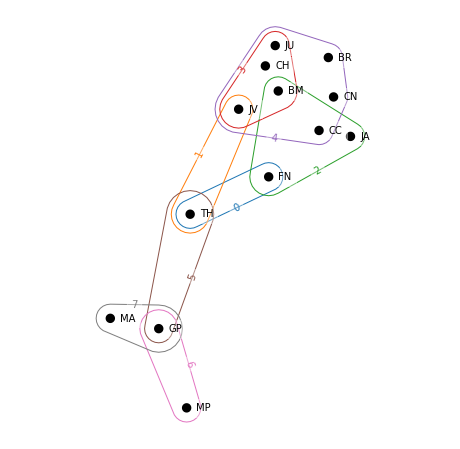

In [9]:
hnx.draw(H)

/Users/aren438/projects/HyperNetX/hypernetx/drawing/rubber_band.py:98: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return .0125*np.median([pdist(np.vstack(map(pos.get, H.nodes))).max()


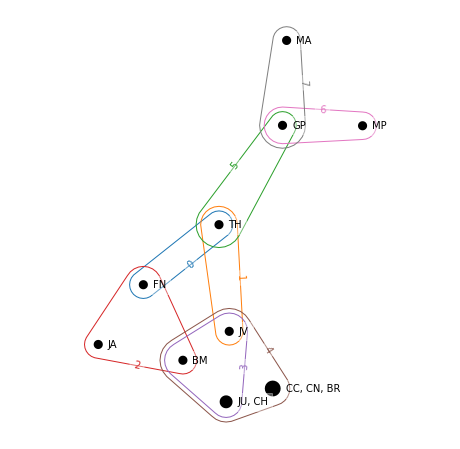

In [10]:
hnx.draw(H.collapse_nodes())

## New Behavior: Specify a numeric radius

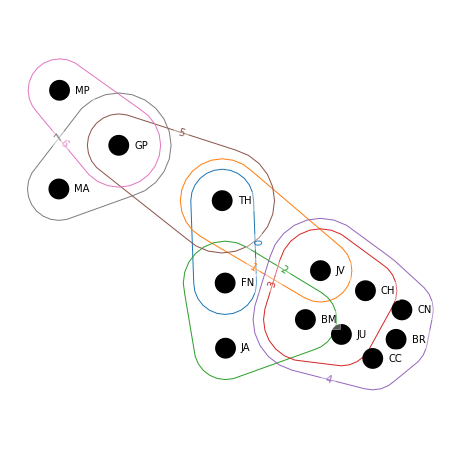

In [34]:
# simple example
hnx.draw(H, node_radius=2)

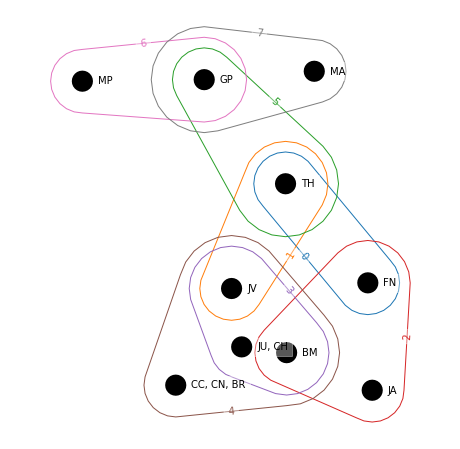

In [35]:
# ensure override when nodes are collapsed
hnx.draw(H.collapse_nodes(), node_radius=2)

## Specify a radius dictionary

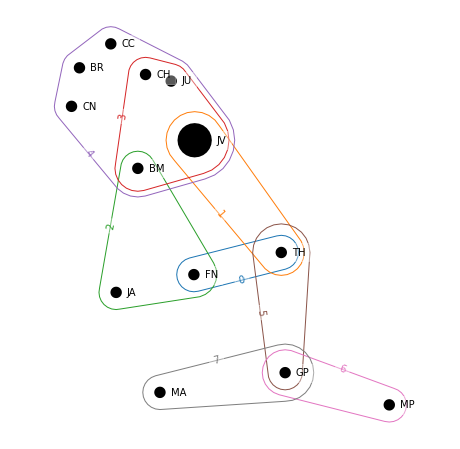

In [53]:
node_radius = {
    v: 3 if v == 'JV' else 1
    for v in H.nodes
}

# make Jean Valjean larger than the rest
hnx.draw(H, node_radius=node_radius)